In [1]:
import graphlab


## Loading Reservoir dataset

In [2]:
Damdata= graphlab.SFrame('DamData.csv')

This non-commercial license of GraphLab Create for academic use is assigned to erseph@gmail.com and will expire on October 13, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\aarth\AppData\Local\Temp\graphlab_server_1510584057.log.0


Finished parsing file C:\Users\aarth\Downloads\Git\Reservoir and Rain Analysis\DamData.csv

Parsing completed. Parsed 100 lines in 0.037538 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,long,float,long,long,long,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\aarth\Downloads\Git\Reservoir and Rain Analysis\DamData.csv

Parsing completed. Parsed 605 lines in 0.046845 secs.

## Exploring SFrame

In [3]:
Damdata.head()

Date,Reservoir,Full Tank Level (ft),Full Capacity mcft,Level (ft),Storage Mcft,Inflow (cusecs)
01-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.8,1259,278
02-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.85,1259,0
03-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.9,1268,104
04-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.0,1284,185
05-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.15,1310,301
06-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.5,1371,706
07-11-2005,CHEMBARAMBAKKAM,85.4,3645,77.5,1739,4259
08-11-2005,CHEMBARAMBAKKAM,85.4,3645,79.15,2080,3900
09-11-2005,CHEMBARAMBAKKAM,85.4,3645,80.5,2387,3600
10-11-2005,CHEMBARAMBAKKAM,85.4,3645,81.35,2591,2400


In [6]:
graphlab.canvas.set_target('ipynb')

In [22]:
Damdata['date_obs'] = Damdata['Date'].str_to_datetime("%d-%m-%Y")

## Plot of Outflow (cusecs) against time series

In [23]:
Damdata.show(view="Scatter Plot", x="date_obs", y="Outflow (cusecs)")

In [24]:
Damdata.add_columns(Damdata['date_obs'].split_datetime(column_name_prefix = ''))

Date,Reservoir,Full Tank Level (ft),Full Capacity mcft,Level (ft),Storage Mcft,Inflow (cusecs)
01-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.8,1259,278
02-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.85,1259,0
03-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.9,1268,104
04-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.0,1284,185
05-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.15,1310,301
06-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.5,1371,706
07-11-2005,CHEMBARAMBAKKAM,85.4,3645,77.5,1739,4259
08-11-2005,CHEMBARAMBAKKAM,85.4,3645,79.15,2080,3900
09-11-2005,CHEMBARAMBAKKAM,85.4,3645,80.5,2387,3600
10-11-2005,CHEMBARAMBAKKAM,85.4,3645,81.35,2591,2400


In [25]:
Damdata.remove_column('hour')
Damdata.remove_column('minute')
Damdata.remove_column('second')

Date,Reservoir,Full Tank Level (ft),Full Capacity mcft,Level (ft),Storage Mcft,Inflow (cusecs)
01-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.8,1259,278
02-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.85,1259,0
03-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.9,1268,104
04-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.0,1284,185
05-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.15,1310,301
06-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.5,1371,706
07-11-2005,CHEMBARAMBAKKAM,85.4,3645,77.5,1739,4259
08-11-2005,CHEMBARAMBAKKAM,85.4,3645,79.15,2080,3900
09-11-2005,CHEMBARAMBAKKAM,85.4,3645,80.5,2387,3600
10-11-2005,CHEMBARAMBAKKAM,85.4,3645,81.35,2591,2400


In [26]:
Damdata.show(view="Bar Chart", x="year", y="Outflow (cusecs)")
Damdata.show(view="Bar Chart", x="year", y="Rainfall (mm)")


## Prediction with Regression Analysis

In [29]:
train_data,test_data = Damdata.random_split(.8,seed=0)

In [30]:
Rainfall_only_model = graphlab.linear_regression.create(train_data, target='Outflow (cusecs)', features=['Rainfall (mm)'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 476

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 17104.526275       | 1501.162035   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [31]:
print Rainfall_only_model.evaluate(test_data)

{'max_error': 10546.926029058945, 'rmse': 1868.6393902574985}


In [32]:
print test_data['Outflow (cusecs)'].mean()

392.627906977


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

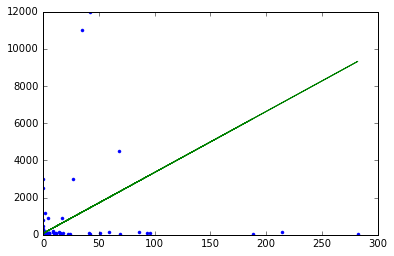

In [34]:
plt.plot(test_data['Rainfall (mm)'],test_data['Outflow (cusecs)'],'.',
        test_data['Rainfall (mm)'],Rainfall_only_model.predict(test_data),'-')

In [35]:
all_features_model = graphlab.linear_regression.create(train_data,target='Outflow (cusecs)',features=["Rainfall (mm)","Inflow (cusecs)", 
                                                                                                      "Level (ft)","Storage Mcft", "year", 
                                                                                                      "month", "day"],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 476

Number of features          : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 5431.079127        | 737.987961    |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [36]:
print all_features_model.evaluate(test_data)

{'max_error': 8552.09367393052, 'rmse': 945.7044759574522}


In [37]:
train_data,test_data = Damdata.random_split(.8,seed=0)

In [38]:
print Rainfall_only_model.evaluate(test_data)
print all_features_model.evaluate(test_data)

{'max_error': 10546.926029058945, 'rmse': 1868.6393902574985}
{'max_error': 8552.09367393052, 'rmse': 945.7044759574522}


RMSE has been brought down from 1868.64 to 945.70 with the inclusion of storage level and inflow features.

In [39]:
current=Damdata[Damdata['year'=='2017']]

In [40]:
print Rainfall_only_model.predict(current)

[173.873406828891, 75.47336343564768, 141.07339236447658, 305.0734646865488, 1387.4739420122255, 1846.6741445140278, 5651.475822386104, 1781.0741155851988, 961.0737539748377, 75.47336343564768, 75.47336343564768, 239.47343575771993, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 272.27345022213433, 2305.8743470158297, 1682.6740721919555, 829.87369611718, 862.6737105815944, 2305.8743470158297, 436.27352254420657, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 141.07339236447658, 8439.477051861331, 1453.0739709410545, 108.27337790006213, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 75.47336343564768, 173.873406828891, 206.67342129330547, 1321.8739130833965, 141.07339236447658, 75.47336343564768, 75.47336343564768, 75.47336343564768, 797.0736816527655, 1059.473797368081, 337.87347915096325, 141.07339236447658, 75.4733634356476

In [41]:
print all_features_model.predict(current)

[-46.24641640197797, -323.9981309048144, -217.93061946648686, -154.20993545339297, -211.45027394209546, 148.01339135256694, 3305.906901871944, 3585.44625988759, 3407.3075156070213, 2274.473490469026, 881.904674718613, 106.56814202942132, 140.80330041056868, -283.6762107600298, -277.8009819623694, -271.925753164709, -266.05052436704864, -260.17529556938825, -254.3698867645644, -248.3882084892739, -276.51514366050833, 293.6548847645354, 1214.6187470996783, 3412.3372109814227, 3412.5570491164062, 4249.522380590659, 2421.322672400609, 1951.4637735273886, 343.50872744408025, 349.38395624174063, -192.94736698314546, -198.3829195108383, 9137.687317776765, 12499.502381331535, 11660.600635410596, 5754.218493572218, 165.48210278252054, 1290.0736344958968, 606.5571953373214, 243.54918760721011, 756.6841033692817, 319.08093562589283, 1803.1503122447657, 4714.12570320838, 3655.5278739116247, 2048.23095929513, 978.3223486730221, 1456.7931740968797, 1463.885825669889, 625.7355658084166, 547.484582362

In [24]:
Damdata.head()

Date,Reservoir,Full Tank Level (ft),Full Capacity mcft,Level (ft),Storage Mcft,Inflow (cusecs)
01-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.8,1259,278
02-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.85,1259,0
03-11-2005,CHEMBARAMBAKKAM,85.4,3645,74.9,1268,104
04-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.0,1284,185
05-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.15,1310,301
06-11-2005,CHEMBARAMBAKKAM,85.4,3645,75.5,1371,706
07-11-2005,CHEMBARAMBAKKAM,85.4,3645,77.5,1739,4259
08-11-2005,CHEMBARAMBAKKAM,85.4,3645,79.15,2080,3900
09-11-2005,CHEMBARAMBAKKAM,85.4,3645,80.5,2387,3600
10-11-2005,CHEMBARAMBAKKAM,85.4,3645,81.35,2591,2400


In [66]:
predict_dates = {'Date':[13-11-2017], 
              'Reservoir':['CHEMBARAMBAKKAM'], 
                 'Level (ft)':[76],
              'Rainfall (mm)':[70], 
              'year':[2017],
              'month':[11],
                'day':[13],
                'Inflow (cusecs)':[1000]}

In [67]:
print Rainfall_only_model.predict(graphlab.SFrame(predict_dates))

[2371.4743759446587]


In [68]:
print all_features_model.predict(graphlab.SFrame(predict_dates))

[495.988338071013]
